In [ ]:
# IMDB Data Preparation

Author: Sunil Kuruba

In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv('tmdb_enriched_movies.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert data types
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
num_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
df.dropna(subset=['budget', 'revenue'], inplace=True)

# Strip and lowercase text fields
text_cols = ['language', 'genres', 'production_companies', 'top_cast', 'keywords', 'status']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Split multi-value columns
df['genres_list'] = df['genres'].str.split(', ')
df['top_cast_list'] = df['top_cast'].str.split(', ')
df['keywords_list'] = df['keywords'].str.split(', ')

# Remove duplicates
df.drop_duplicates(subset=['movie_id', 'title'], inplace=True)

# Remove invalid rows
df = df[(df['budget'] >= 0) & (df['revenue'] >= 0) & (df['runtime'] > 0)]

# TBD remove unwanted columns 

# Final preview
df.head()


,movie_id,imdb_id,title,vote_average,vote_count,status,release_date,budget,revenue,popularity,runtime,language,genres,production_companies,director,top_cast,keywords,genres_list,top_cast_list,keywords_list
0,27205,tt1375666,Inception,8.369,37309,released,2010-07-15,160000000,839030630,26.3533,148,en,"action, science fiction, adventure","legendary pictures, syncopy, warner bros. pict...",Christopher Nolan,"leonardo dicaprio, joseph gordon-levitt, ken w...","rescue, mission, dreams, airplane, paris, fran...","[action, science fiction, adventure]","[leonardo dicaprio, joseph gordon-levitt, ken ...","[rescue, mission, dreams, airplane, paris, fra..."
1,157336,tt0816692,Interstellar,8.453,36903,released,2014-11-05,165000000,746606706,44.7344,169,en,"adventure, drama, science fiction","legendary pictures, syncopy, lynda obst produc...",Christopher Nolan,"matthew mcconaughey, anne hathaway, michael caine","rescue, future, spacecraft, race against time,...","[adventure, drama, science fiction]","[matthew mcconaughey, anne hathaway, michael c...","[rescue, future, spacecraft, race against time..."
2,155,tt0468569,The Dark Knight,8.519,33688,released,2008-07-16,185000000,1004558444,34.4859,152,en,"drama, action, crime, thriller","warner bros. pictures, legendary pictures, syn...",Christopher Nolan,"christian bale, heath ledger, aaron eckhart","joker, sadism, chaos, secret identity, crime f...","[drama, action, crime, thriller]","[christian bale, heath ledger, aaron eckhart]","[joker, sadism, chaos, secret identity, crime ..."
3,19995,tt0499549,Avatar,7.588,32126,released,2009-12-15,237000000,2923706026,32.3911,162,en,"action, adventure, fantasy, science fiction","dune entertainment, lightstorm entertainment, ...",James Cameron,"sam worthington, zoe saldaña, sigourney weaver","paraplegic, attachment to nature, culture clas...","[action, adventure, fantasy, science fiction]","[sam worthington, zoe saldaña, sigourney weaver]","[paraplegic, attachment to nature, culture cla..."
4,24428,tt0848228,The Avengers,7.735,31521,released,2012-04-25,220000000,1518815515,35.1429,143,en,"science fiction, action, adventure",marvel studios,Joss Whedon,"robert downey jr., chris evans, mark ruffalo","new york city, superhero, shield, based on com...","[science fiction, action, adventure]","[robert downey jr., chris evans, mark ruffalo]","[new york city, superhero, shield, based on co..."


Budget vs Revenue Scatter Plot
Purpose: Understand how budget relates to revenue.

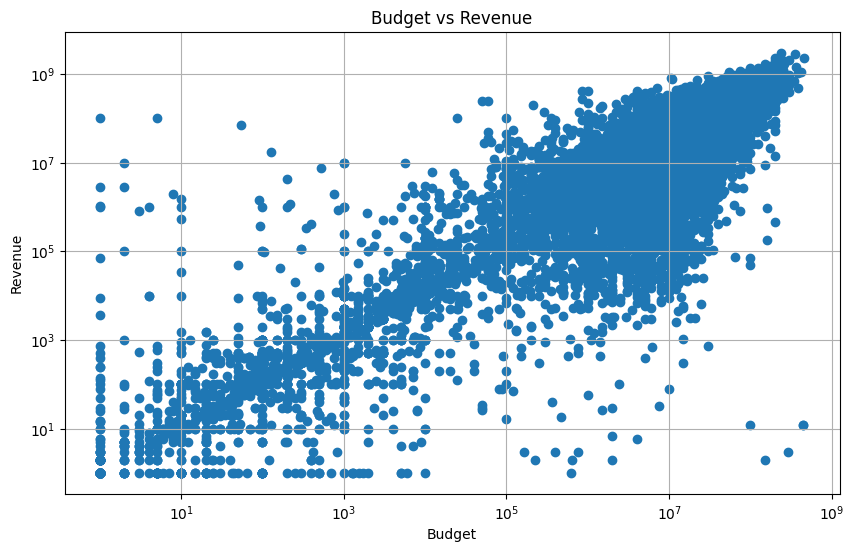

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs Revenue')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


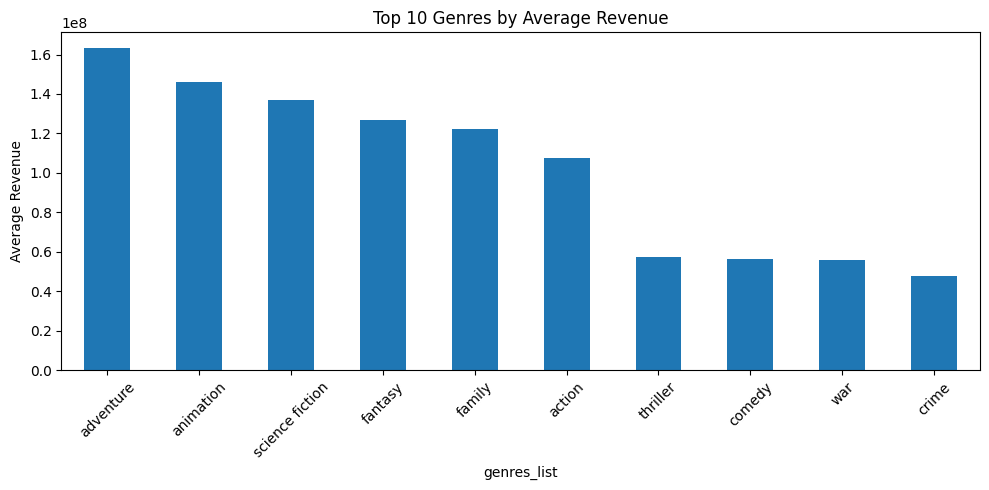

In [11]:
from collections import Counter
import pandas as pd

# Explode genre lists
genre_revenue = df.explode('genres_list')
genre_avg_revenue = genre_revenue.groupby('genres_list')['revenue'].mean().sort_values(ascending=False).head(10)

genre_avg_revenue.plot(kind='bar', figsize=(10,5), title='Top 10 Genres by Average Revenue')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


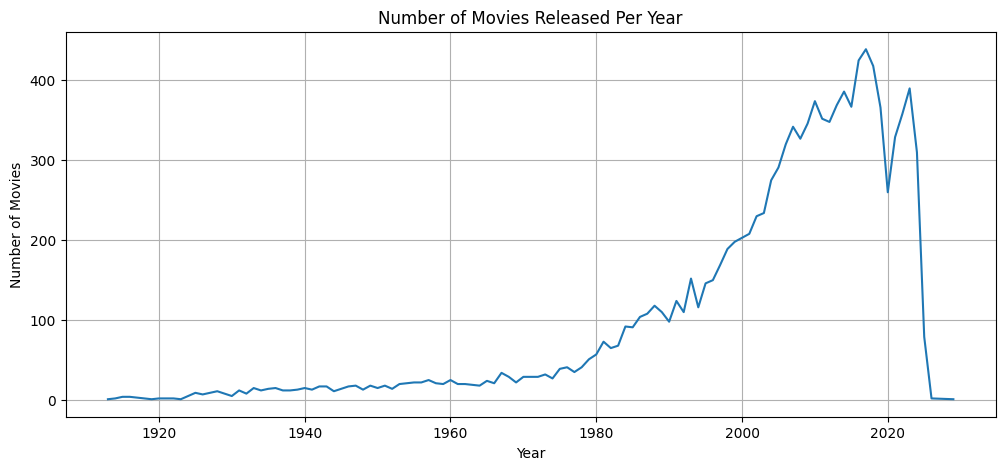

In [12]:
df['release_year'] = df['release_date'].dt.year
df['release_year'].value_counts().sort_index().plot(figsize=(12,5), title='Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


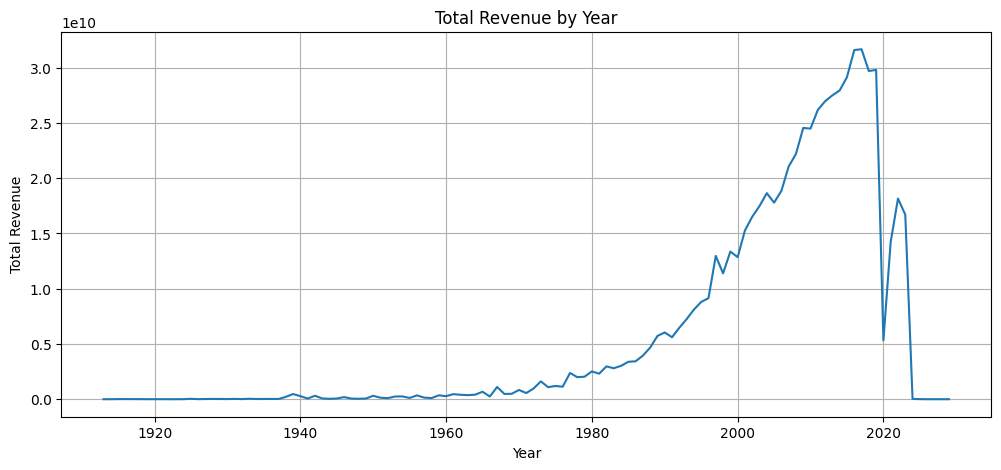

In [13]:
df.groupby('release_year')['revenue'].sum().plot(figsize=(12,5), title='Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


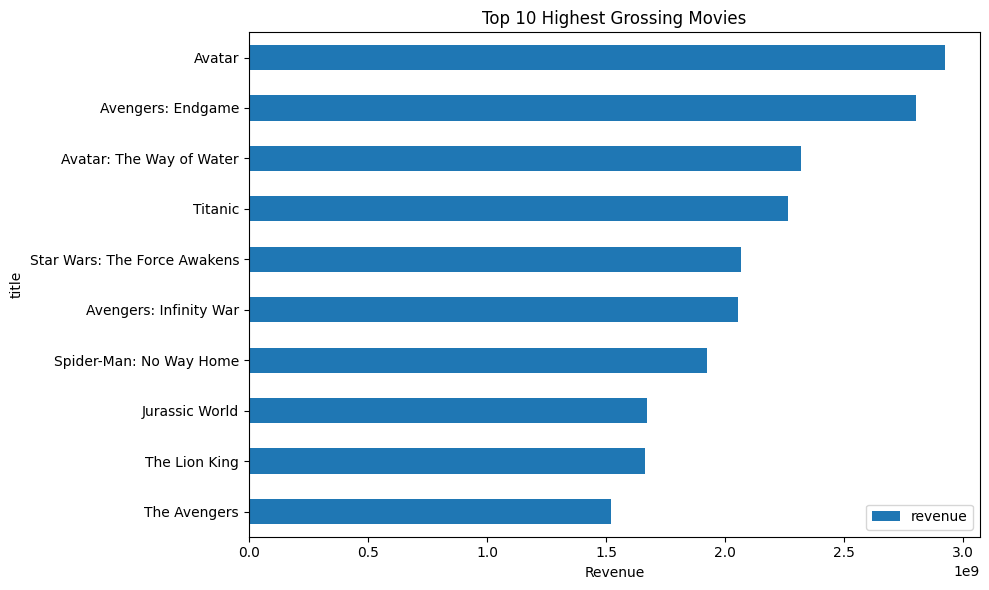

In [15]:
top_movies = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
top_movies.set_index('title').plot(kind='barh', figsize=(10,6), title='Top 10 Highest Grossing Movies')
plt.xlabel('Revenue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



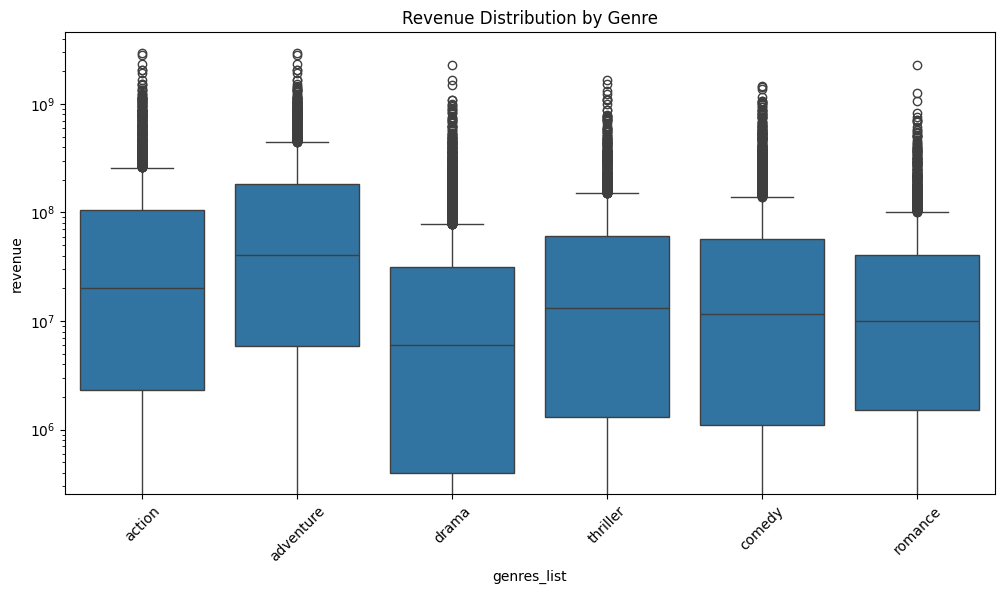

In [17]:
import seaborn as sns

# Plot only popular genres (optional filtering)
popular_genres = df.explode('genres_list')
popular_genres = popular_genres[popular_genres['genres_list'].isin(
    popular_genres['genres_list'].value_counts().head(6).index)]

plt.figure(figsize=(12,6))
sns.boxplot(x='genres_list', y='revenue', data=popular_genres)
plt.yscale('log')
plt.title('Revenue Distribution by Genre')
plt.xticks(rotation=45)
plt.show()
